In [1]:
from neuralnet.neuralnet_decoupled import *

In [14]:
nn = NeuralNet(
    layer_shapes=(
        (2, 20),
        (20, 40),
        (40, 1)
    )
)

In [15]:
nn.layer_shapes

[(3, 20), (21, 40), (41, 1)]

In [16]:
nn.layers.weights

[array([[-0.02825862,  0.01746227, -0.10776375, -0.02752268,  0.07024   ,
          0.12609096,  0.03909985, -0.19120482, -0.12333418, -0.28119426,
         -0.22297504,  0.0356798 ,  0.11893382, -0.23260272,  0.06160092,
         -0.25496758,  0.44817448,  0.39038534, -0.05305363, -0.1296191 ],
        [ 0.07608116,  0.07497669, -0.06343711, -0.13585263,  0.18559138,
          0.08155941, -0.0228971 , -0.0182592 ,  0.03360125, -0.14227977,
          0.11023181,  0.05823611, -0.12717203,  0.16432392,  0.19575845,
          0.13173631, -0.02103723, -0.05491173, -0.17057687, -0.09746024],
        [ 0.03274594, -0.01367883, -0.26193645,  0.02142215, -0.14490152,
          0.06731488, -0.13463375, -0.19824798, -0.1411233 ,  0.09577192,
          0.16267376,  0.1666342 , -0.053087  ,  0.09176911,  0.04105077,
         -0.242385  , -0.02869699,  0.14322153,  0.00338415, -0.1111001 ]]),
 array([[ 5.78532047e-02,  7.23649717e-02, -2.77421008e-01,
          7.65657400e-02,  7.04109758e-02, -1.7

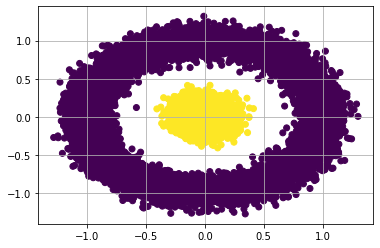

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification, make_circles

X, y = make_circles(20000, shuffle=True, noise=0.1, factor=0.05)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid(True)
plt.show()

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, 
                                test_size=0.33, random_state=10)

In [18]:
nn.optimize(Xtrain, Ytrain, epochs=1500, batch_size=64, learning_rate=5e-2, show_after=200)

Epoch 0 | Error: -0.018278404 | WV0: 0.00102296 | WV1: 0.003775537
Epoch 200 | Error: -5.1085e-05 | WV0: -0.000248394 | WV1: 0.000101632
Epoch 400 | Error: -4.2608e-05 | WV0: -0.000556701 | WV1: 0.000160225
Epoch 600 | Error: -4.3171e-05 | WV0: -0.000925629 | WV1: -0.000331752
Epoch 800 | Error: -5.9248e-05 | WV0: -0.00494324 | WV1: -0.000644037
Epoch 1000 | Error: -0.000137788 | WV0: -0.038244605 | WV1: 0.115235088
Epoch 1200 | Error: -0.000147993 | WV0: 0.002377679 | WV1: 0.015380249
Epoch 1400 | Error: -0.000138479 | WV0: 0.004167788 | WV1: -0.000582211


In [19]:
train_forwards = nn.forward_propagation(Xtrain)
ytrain_pred = np.around(train_forwards[-1])
precision = (ytrain_pred == Ytrain.reshape(-1,1)).mean()
print(f"Precission on Training Set: {round(precision, 2) * 100}%")

forwards = nn.forward_propagation(Xtest)
ypred = np.around(forwards[-1])
precision = (ypred == Ytest.reshape(-1,1)).mean()
print(f"Precission on Test set: {round(precision, 2) * 100}%")

Precission on Training Set: 100.0%
Precission on Test set: 100.0%


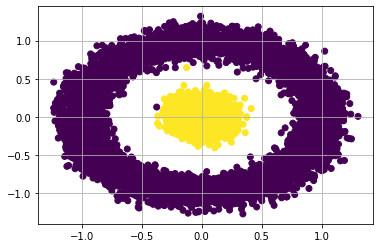

In [20]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain_pred)
plt.grid(True)
plt.show()